#### Optimizer

[module for LARS](https://github.com/kakaobrain/torchlars)

or copy-paste from somewhere else

In [1]:
# ! pip install torchlars
# from torchlars import LARS
# optimizer = LARS(optim.SGD(model.parameters(), lr=0.1))

In [2]:
# # Example

# from torchlars import LARS

# base_optimizer = optim.SGD(model.parameters(), lr=0.1)
# optimizer = LARS(optimizer=base_optimizer, eps=1e-8, trust_coef=0.001)

# output = model(input)
# loss = loss_fn(output, target)
# loss.backward()

# optimizer.step()

## Training

In [3]:
import torch 
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')

importing Jupyter notebook from model.ipynb
importing Jupyter notebook from data_set_loader.ipynb


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 224, 224, 3])
torch.Size([224, 224, 3])


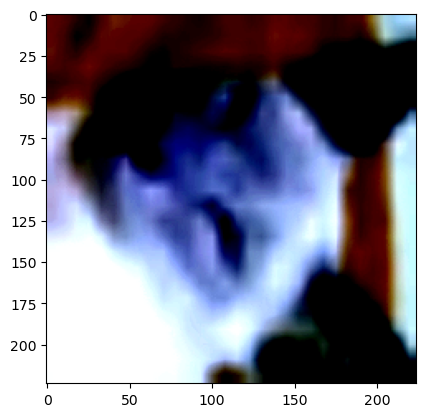

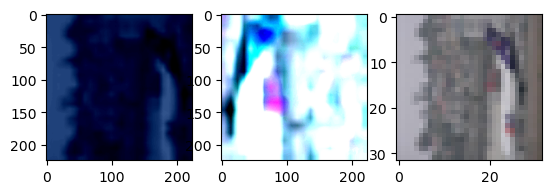

In [4]:
# ! pip install import-ipynb
import import_ipynb
from model import *
from data_set_loader import *

import torch.optim 

### Training Loop

In [5]:
def model_train(train_dataloader, val_dataloader, model, criterion, optimizer, epochs=10): 

    for epoch in range(epochs): 
        train_loss = 0
        train_size = 0

        val_loss = 0
        val_size = 0
        # Training
        
        for step, (x1, x2, y) in enumerate(train_dataloader): 
            
            model.train()
            
            x1 = x1.to(device)
            x2 = x2.to(device)

            train_size += y.shape[0]

            optimizer.zero_grad()
            z, labels = model(x1, x2)
            loss = criterion(z, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()*y.shape[0]

        # Validation 
        for x1, x2, y in val_dataloader:
            
            model.eval()
            x1 = x1.to(device)
            x2 = x2.to(device)

            val_size += y.shape[0]

            z, labels = model(x1, x2)
            loss = criterion(z, labels)
            val_loss += loss.item()*y.shape[0]

        print(f"Epoch: {epoch}/{epochs} \t T Loss: {train_loss/train_size}\
          \t V Loss: {val_loss/val_size}")


In [6]:
batch_size = 10
train_data = ContrastiveCIFAR10()
val_data = ContrastiveCIFAR10(mode = 'val')

In [7]:
train_dl = DataLoader(train_data, batch_size)
val_dl = DataLoader(val_data, batch_size)

In [8]:
model = SimCLR().to(device)
criterion = NTXentLoss(temperature=0.1).cuda()
optimizer = torch.optim.Adam(model.parameters())

model_train(train_dl, val_dl, model, criterion, optimizer)

/home/sshad/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/home/sshad/anaconda3/lib/python3.11/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0/10 	 T Loss: 0.12866524627950277          	 V Loss: 0.12567478036344984
Epoch: 1/10 	 T Loss: 0.04268940185489191          	 V Loss: 0.11721260228659958
Epoch: 2/10 	 T Loss: 0.022207864273193993          	 V Loss: 0.09246016764105297
Epoch: 3/10 	 T Loss: 0.019497355343628443          	 V Loss: 0.08226766425999812
Epoch: 4/10 	 T Loss: 0.006227404838922666          	 V Loss: 0.06421080302086193
Epoch: 5/10 	 T Loss: 0.010872368652853766          	 V Loss: 0.05092174446140416
Epoch: 6/10 	 T Loss: 0.004245143494190415          	 V Loss: 0.05736253915168345
Epoch: 7/10 	 T Loss: 0.003664757323822414          	 V Loss: 0.04720883209526073
Epoch: 8/10 	 T Loss: 0.002623297959435149          	 V Loss: 0.05419430307298899
Epoch: 9/10 	 T Loss: 0.0020990045882208507          	 V Loss: 0.037632696404587475
